# Tính các đại lượng thống kê cho hai tập dữ liệu:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/kaggle/input/babydataset/babies.txt', delim_whitespace=True)

smoke_yes = data[data['smoke'] == 1]['bwt']
smoke_no = data[data['smoke'] == 0]['bwt']

def calculate_statistics(series):
    return {
        'Số lượng': len(series),
        'Min': series.min(),
        'Max': series.max(),
        'Mean': series.mean(),
        'Sd': series.std(),
        'Var': series.var(),
        'Median': series.median(),
        'Quantile 0%': series.quantile(0),
        'Quantile 25%': series.quantile(0.25),
        'Quantile 50%': series.quantile(0.5),
        'Quantile 75%': series.quantile(0.75),
        'IQR': series.quantile(0.75) - series.quantile(0.25),
        'Range': np.max(series) - np.min(series),
    }

stats_smoke_yes = calculate_statistics(smoke_yes)
stats_smoke_no = calculate_statistics(smoke_no)

result = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc': stats_smoke_yes,
    'TH2: Bà mẹ không hút thuốc': stats_smoke_no,
})

print(result)


              TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc
Số lượng                484.000000                  742.000000
Min                      58.000000                   55.000000
Max                     163.000000                  176.000000
Mean                    114.109504                  123.047170
Sd                       18.098946                   17.398689
Var                     327.571835                  302.714371
Median                  115.000000                  123.000000
Quantile 0%              58.000000                   55.000000
Quantile 25%            102.000000                  113.000000
Quantile 50%            115.000000                  123.000000
Quantile 75%            126.000000                  134.000000
IQR                      24.000000                   21.000000
Range                   105.000000                  121.000000


/tmp/ipykernel_17/1431268320.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('/kaggle/input/babydataset/babies.txt', delim_whitespace=True)


# Phân tích dữ liệu dựa trên các đại lượng vừa tính.

In [2]:
from scipy.stats import skew, kurtosis

# Tính độ lệch (skewness) và độ nhọn (kurtosis)
def calculate_distribution_shape(series):
    return {
        'Skewness': skew(series),
        'Kurtosis': kurtosis(series, fisher=True) + 3  # Adjust to match "excess kurtosis" + 3
    }

# Phân tích hình dạng phân bố dữ liệu
shape_smoke_yes = calculate_distribution_shape(smoke_yes)
shape_smoke_no = calculate_distribution_shape(smoke_no)

# Thêm vào thống kê
stats_smoke_yes.update(shape_smoke_yes)
stats_smoke_no.update(shape_smoke_no)

# Hiển thị kết quả
result_distribution = pd.DataFrame({
    'TH1: Bà mẹ hút thuốc': stats_smoke_yes,
    'TH2: Bà mẹ không hút thuốc': stats_smoke_no,
})

print(result_distribution)


              TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc
Số lượng                484.000000                  742.000000
Min                      58.000000                   55.000000
Max                     163.000000                  176.000000
Mean                    114.109504                  123.047170
Sd                       18.098946                   17.398689
Var                     327.571835                  302.714371
Median                  115.000000                  123.000000
Quantile 0%              58.000000                   55.000000
Quantile 25%            102.000000                  113.000000
Quantile 50%            115.000000                  123.000000
Quantile 75%            126.000000                  134.000000
IQR                      24.000000                   21.000000
Range                   105.000000                  121.000000
Skewness                 -0.033595                   -0.186984
Kurtosis                  2.988032                    4

**Xét tập dữ liệu ứng với trường hợp bà mẹ không hút thuốc**

- Trung bình (Mean) = 123.05
- Trung vị (Median) = 123
- Dữ liệu tập trung trong khoảng 123 ± 1.
- Phương sai (Variance): var = 302.71
- Độ lệch chuẩn (Standard deviation): sd = 17.39
- Khoảng giá trị (Range): min = 55, max = 176 → range = 121
- Khoảng cách giữa hai phần tư vị (IQR): Q3 - Q1 = 134 - 113 = 21

Nhận xét: Dữ liệu phân bố tương đối gần nhau nhưng có một khoảng biến động lớn hơn so với trường hợp bà mẹ hút thuốc.

Hình dạng phân bố của dữ liệu:

- Độ lệch (Skewness):
Nếu Skewness > 0, dữ liệu lệch phải; Skewness < 0, dữ liệu lệch trái.
Skewness ~ -0.02 → Dữ liệu cân đối hơn so với trường hợp bà mẹ hút thuốc.

- Độ bè nhọn (Kurtosis):
Nếu Kurtosis > 3, đỉnh nhọn; Kurtosis < 3, đỉnh bè.
Kurtosis ~ 3.1 → Đỉnh hơi nhọn, phân bố tương đối chuẩn.
Nhận xét: Dữ liệu cân đối, ít lệch hơn trường hợp hút thuốc, với đỉnh phân bố hơi nhọn.

# So sánh các giá trị thống kê mô tả của hai tập dữ liệu.

Quantile 50%:             115                 123

Sự khác biệt về vị trí tập trung dữ liệu: chênh lệch khoảng 123 -115 = 8


**Nhận xét: khác biệt không đáng kể.**


In [3]:
comparison = pd.DataFrame({
    "TH1: Bà mẹ hút thuốc": stats_smoke_yes,
    "TH2: Bà mẹ không hút thuốc": stats_smoke_no
})
comparison["Chênh lệch (TH2 - TH1)"] = comparison["TH2: Bà mẹ không hút thuốc"] - comparison["TH1: Bà mẹ hút thuốc"]
comparison["Chênh lệch (TH2 - TH1)"] = comparison["TH2: Bà mẹ không hút thuốc"] - comparison["TH1: Bà mẹ hút thuốc"]

# Hiển thị kết quả
print("Sự khác biệt về tính biến động của dữ liệu:")
print(comparison.loc[["Sd", "Var", "Range", "IQR"]])

print("\nSự khác biệt về hình dạng phân bố của dữ liệu:")
print(comparison.loc[["Skewness", "Kurtosis"]])

Sự khác biệt về tính biến động của dữ liệu:
       TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc  \
Sd                18.098946                   17.398689   
Var              327.571835                  302.714371   
Range            105.000000                  121.000000   
IQR               24.000000                   21.000000   

       Chênh lệch (TH2 - TH1)  
Sd                  -0.700257  
Var                -24.857464  
Range               16.000000  
IQR                 -3.000000  

Sự khác biệt về hình dạng phân bố của dữ liệu:
          TH1: Bà mẹ hút thuốc  TH2: Bà mẹ không hút thuốc  \
Skewness             -0.033595                   -0.186984   
Kurtosis              2.988032                    4.037060   

          Chênh lệch (TH2 - TH1)  
Skewness               -0.153389  
Kurtosis                1.049028  


Dữ liệu trong trường hợp bà mẹ không hút thuốc có phân bố rộng hơn nhưng phần
dữ liệu tập trung lại hẹp hơn so với trường hợp bà mẹ có hút thuốc. Sự biến động của
dữ liệu trong hai trường hợp không khác biệt nhiều.

Nhận xét: trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn
so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái.

# 2.Biểu diễn hình học của dữ liệu

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


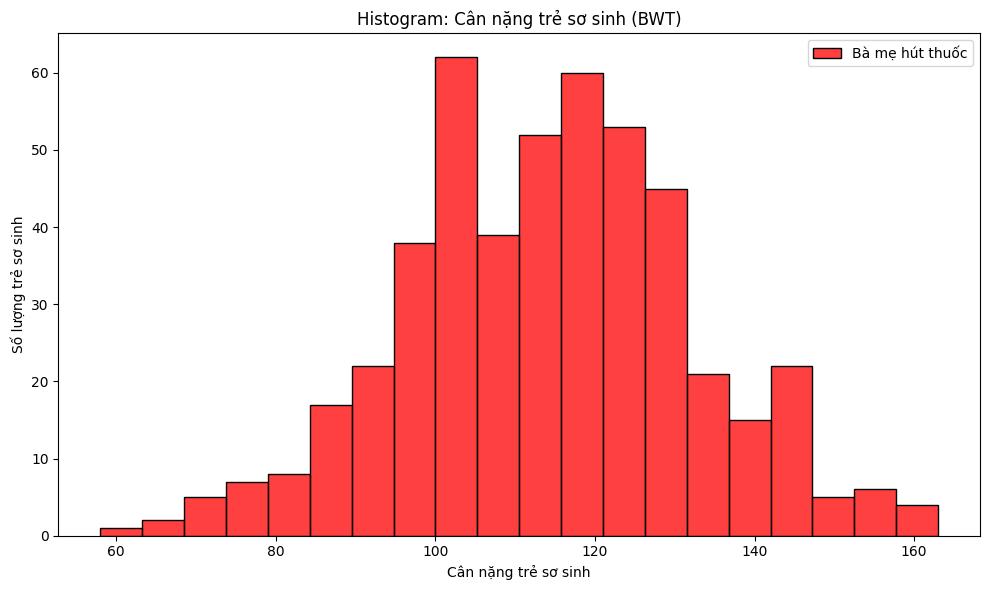

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử stats_smoke_yes chứa các giá trị cân nặng trẻ sơ sinh của nhóm bà mẹ hút thuốc
plt.figure(figsize=(10, 6))

# Histogram: Bà mẹ hút thuốc
sns.histplot(smoke_yes, bins=20, kde=False, color='red', label='Bà mẹ hút thuốc', stat='count')

# Thiết lập tiêu đề và nhãn
plt.title('Histogram: Cân nặng trẻ sơ sinh (BWT)')
plt.xlabel('Cân nặng trẻ sơ sinh')
plt.ylabel('Số lượng trẻ sơ sinh')

# Hiển thị biểu đồ
plt.legend()
plt.tight_layout()
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


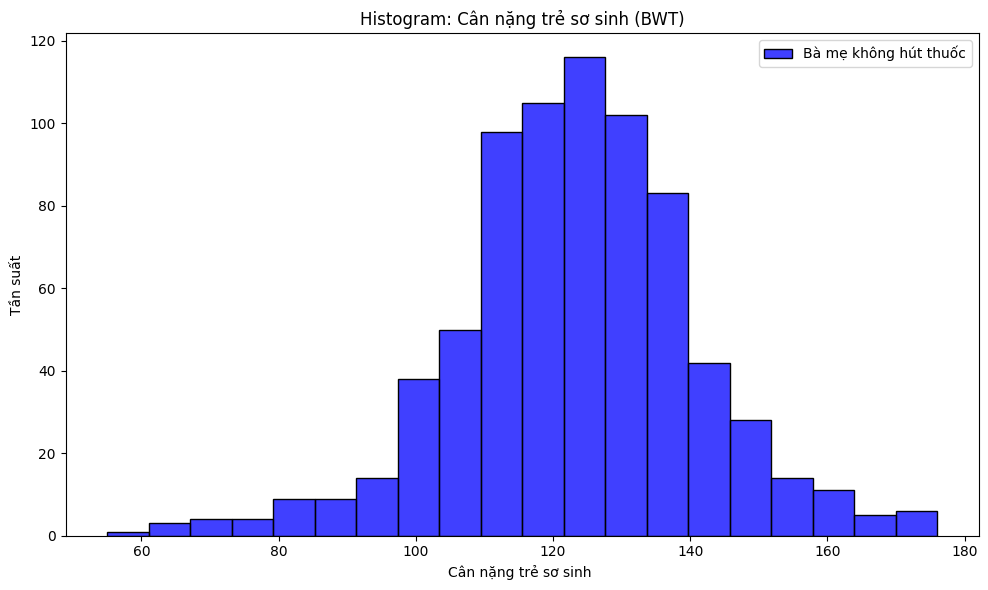

In [5]:

# Tạo histogram cho từng nhóm
plt.figure(figsize=(10, 6))

# Histogram: Bà mẹ không hút thuốc
sns.histplot(smoke_no, bins=20, kde=False, color='blue', label='Bà mẹ không hút thuốc', stat='count')

# Thiết lập tiêu đề và nhãn
plt.title('Histogram: Cân nặng trẻ sơ sinh (BWT)')
plt.xlabel('Cân nặng trẻ sơ sinh ')
plt.ylabel('Tần suất')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


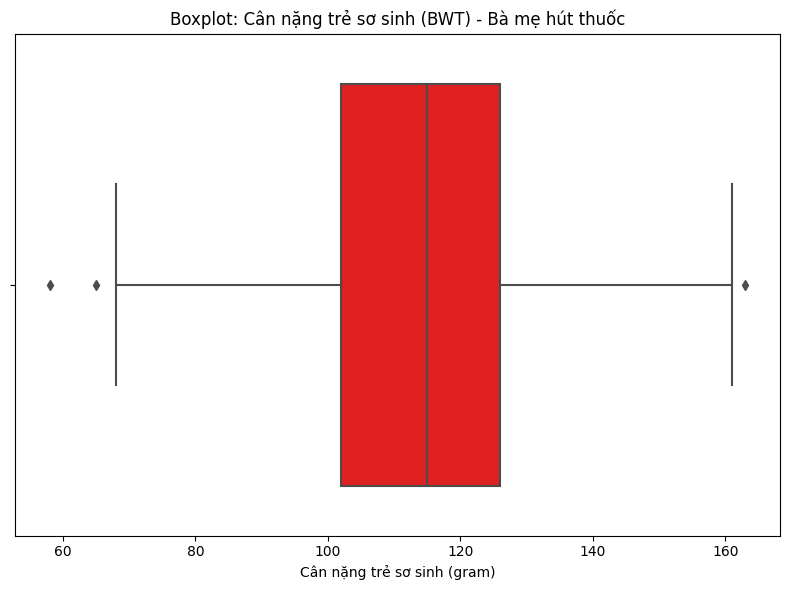

In [6]:
plt.figure(figsize=(8, 6))

# Boxplot: Bà mẹ hút thuốc
sns.boxplot(x=smoke_yes, color='red')

# Thiết lập tiêu đề và nhãn
plt.title('Boxplot: Cân nặng trẻ sơ sinh (BWT) - Bà mẹ hút thuốc')
plt.xlabel('Cân nặng trẻ sơ sinh (gram)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

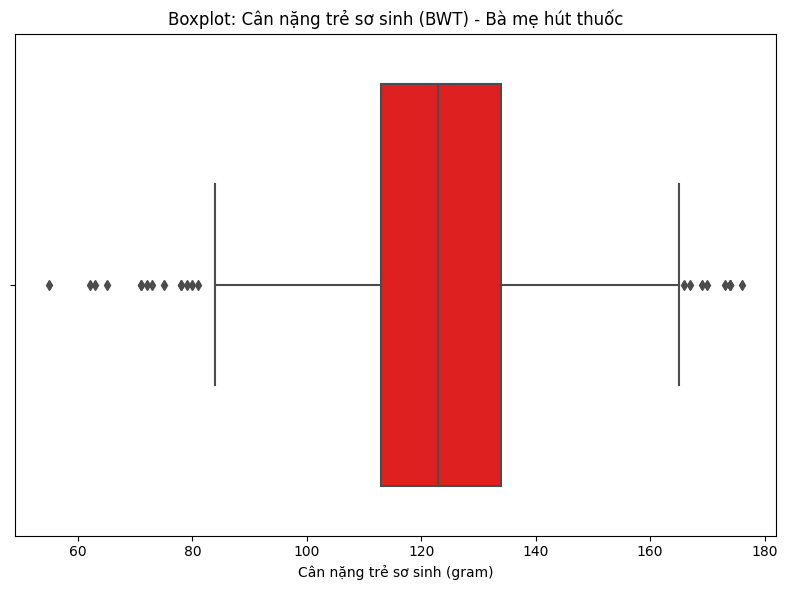

In [7]:
plt.figure(figsize=(8, 6))

# Boxplot: Bà mẹ hút thuốc
sns.boxplot(x=smoke_no, color='red')

# Thiết lập tiêu đề và nhãn
plt.title('Boxplot: Cân nặng trẻ sơ sinh (BWT) - Bà mẹ hút thuốc')
plt.xlabel('Cân nặng trẻ sơ sinh (gram)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


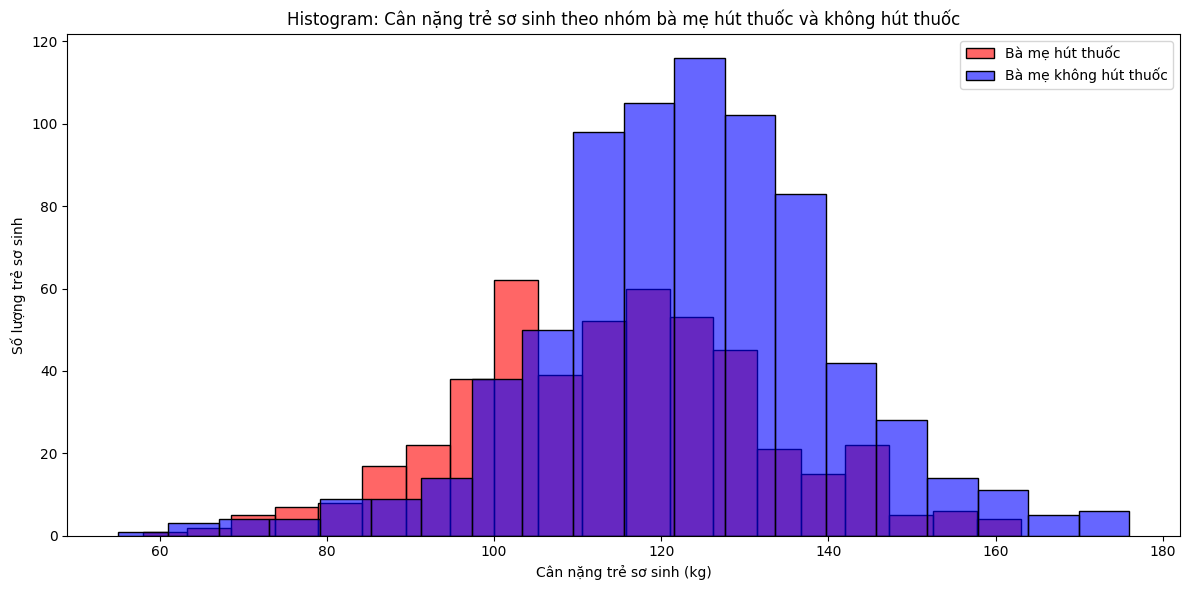

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử smoke_yes và smoke_no chứa các giá trị cân nặng của trẻ sơ sinh nhóm bà mẹ hút thuốc và không hút thuốc
plt.figure(figsize=(12, 6))

# Vẽ Histogram: Bà mẹ hút thuốc
sns.histplot(smoke_yes, bins=20, kde=False, color='red', label='Bà mẹ hút thuốc', stat='count', alpha=0.6)

# Vẽ Histogram: Bà mẹ không hút thuốc
sns.histplot(smoke_no, bins=20, kde=False, color='blue', label='Bà mẹ không hút thuốc', stat='count', alpha=0.6)

# Thiết lập tiêu đề và nhãn
plt.title('Histogram: Cân nặng trẻ sơ sinh theo nhóm bà mẹ hút thuốc và không hút thuốc')
plt.xlabel('Cân nặng trẻ sơ sinh (kg)')
plt.ylabel('Số lượng trẻ sơ sinh')

# Hiển thị biểu đồ
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
std_smoke_yes = np.std(smoke_yes)
std_smoke_no = np.std(smoke_no)

# Tính hệ số lệch (skewness) để đo độ đối xứng
skew_smoke_yes = pd.Series(smoke_yes).skew()
skew_smoke_no = pd.Series(smoke_no).skew()

# Tính giá trị ngoại lệ bằng phương pháp IQR
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if x < lower_bound or x > upper_bound]

outliers_smoke_yes = detect_outliers(smoke_yes)
outliers_smoke_no = detect_outliers(smoke_no)

# In kết quả
print("Biến thiên (Độ lệch chuẩn) - Bà mẹ hút thuốc:", std_smoke_yes)
print("Biến thiên (Độ lệch chuẩn) - Bà mẹ không hút thuốc:", std_smoke_no)
print("Đối xứng (Skewness) - Bà mẹ hút thuốc:", skew_smoke_yes)
print("Đối xứng (Skewness) - Bà mẹ không hút thuốc:", skew_smoke_no)
print("Giá trị ngoại lệ - Bà mẹ hút thuốc:", outliers_smoke_yes)
print("Giá trị ngoại lệ - Bà mẹ không hút thuốc:", outliers_smoke_no)

Biến thiên (Độ lệch chuẩn) - Bà mẹ hút thuốc: 18.080238760547736
Biến thiên (Độ lệch chuẩn) - Bà mẹ không hút thuốc: 17.38696064140674
Đối xứng (Skewness) - Bà mẹ hút thuốc: -0.033699506713282625
Đối xứng (Skewness) - Bà mẹ không hút thuốc: -0.18736306526595664
Giá trị ngoại lệ - Bà mẹ hút thuốc: [58, 163, 65]
Giá trị ngoại lệ - Bà mẹ không hút thuốc: [75, 173, 80, 78, 71, 174, 170, 79, 176, 78, 166, 81, 167, 71, 174, 62, 72, 55, 169, 65, 73, 174, 63]


**Các giá trị tương đương nhau**

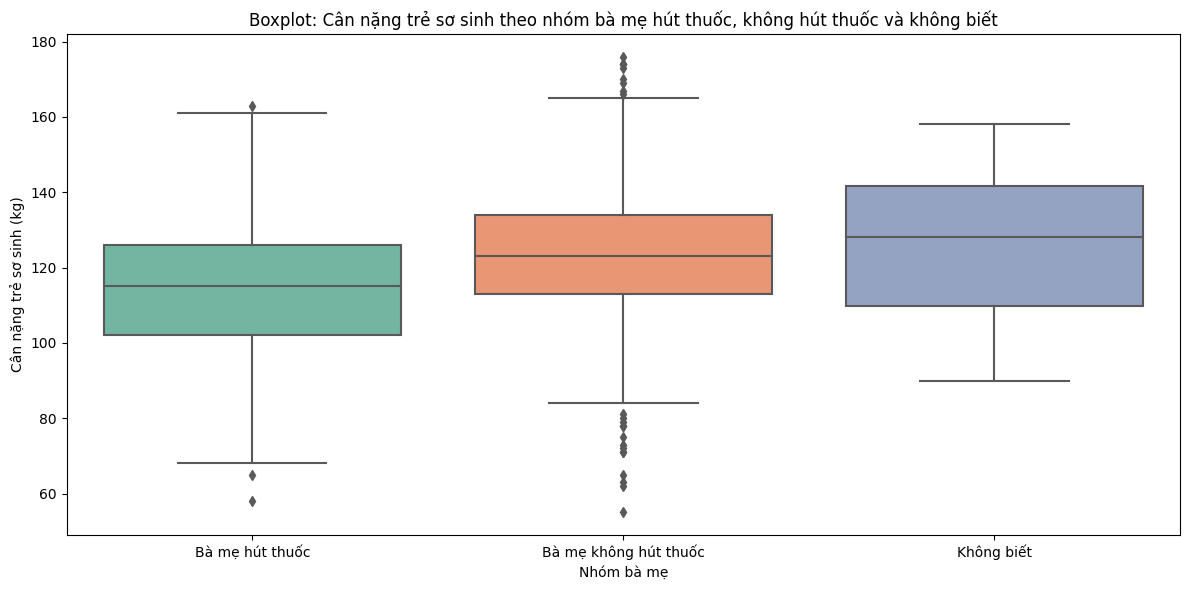

In [10]:
smoke_unknow = data[data['smoke'] == 9]['bwt']
plt.figure(figsize=(12, 6))

sns.boxplot(data=[smoke_yes, smoke_no, smoke_unknow], palette='Set2')

# Thiết lập tiêu đề và nhãn
plt.title('Boxplot: Cân nặng trẻ sơ sinh theo nhóm bà mẹ hút thuốc, không hút thuốc và không biết')
plt.xticks([0, 1, 2], ['Bà mẹ hút thuốc', 'Bà mẹ không hút thuốc', 'Không biết'])
plt.xlabel('Nhóm bà mẹ')
plt.ylabel('Cân nặng trẻ sơ sinh (kg)')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

- Khác biệt về vị trí: giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115). (Trường hợp smoke=9 là trường hợp không biết bà mẹ có hút thuốc hay không, trung vị trong trường hợp này cao hơn so với 2 trường hợp bà mẹ có hút thuốc và không hút thuốc).

- Giá trị ngoại lệ: cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút thuốc có nhiều giá trị ngoại lệ hơn. Ta dùng thêm đồ thị QQ-plot để phân tíchn tích

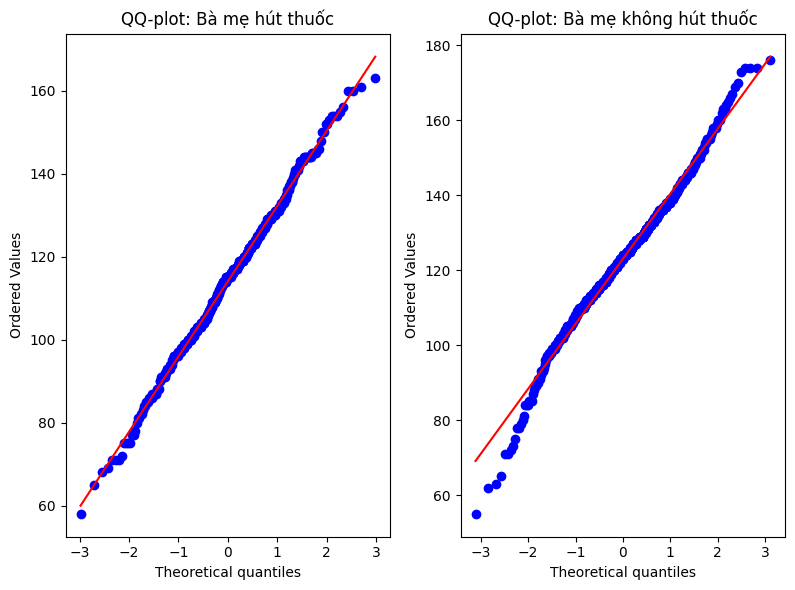

In [11]:
import scipy.stats as stats
# Vẽ QQ-plot cho ba nhóm
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)  # Vẽ 3 QQ-plot cạnh nhau
stats.probplot(smoke_yes, dist="norm", plot=plt)
plt.title('QQ-plot: Bà mẹ hút thuốc')

plt.subplot(1, 3, 2)
stats.probplot(smoke_no, dist="norm", plot=plt)
plt.title('QQ-plot: Bà mẹ không hút thuốc')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

QQ-plot có dạng đường thẳng, suy ra dữ liệu của 2 trường hợp có phân bố tương tự
nhau.